<a href="https://colab.research.google.com/github/GVSU-CIS635/term-project-lone_warrior/blob/main/CIS635_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules
import plotly.express as px

# New Section

In [3]:
df = pd.read_csv('data.csv')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
print('Dataset Information:')
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
print('\nDescriptive Statistics:')
print(df.describe())


Descriptive Statistics:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230  

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# Check for missing values
print('\nMissing Values:')
print(df.isnull().sum())


Missing Values:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
# Handle missing values (example: fill with median for numerical columns)
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
# Remove duplicates
df.drop_duplicates(inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
# Address inconsistencies or outliers (example: remove properties with abnormal square footage)
df = df[(df['sqft_living'] > 500) & (df['sqft_living'] < 10000)]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
# Feature Engineering
df['age'] = df['yr_built'].apply(lambda x: 2024 - x)
df['has_basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
# Select relevant features for clustering
cluster_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'view', 'condition', 'age']
X = df[cluster_features]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init

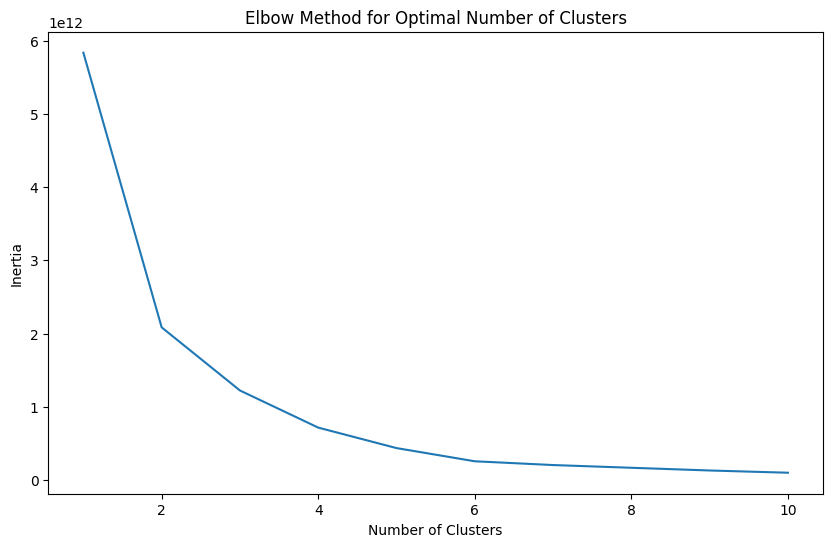

In [12]:
# Determine the optimal number of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertias)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

In [13]:
# Train-test split
target = 'price'
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'age', 'has_basement']
X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
# Preprocessing
numerical_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'age']
categorical_features = ['waterfront', 'view', 'condition', 'has_basement']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [15]:
# Linear Regression
lr = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', LinearRegression())])

lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(lr_mse)
lr_r2 = r2_score(y_test, y_pred_lr)
print(f'Linear Regression: MSE={lr_mse:.2f}, RMSE={lr_rmse:.2f}, R-squared={lr_r2:.2f}')

Linear Regression: MSE=819629083163.75, RMSE=905333.69, R-squared=0.06


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# Decision Tree Regression
dt = Pipeline(steps=[('preprocessor', preprocessor),
                     ('regressor', DecisionTreeRegressor(random_state=42))])

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(dt_mse)
dt_r2 = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression: MSE={dt_mse:.2f}, RMSE={dt_rmse:.2f}, R-squared={dt_r2:.2f}')

Decision Tree Regression: MSE=1029948595477.90, RMSE=1014863.83, R-squared=-0.19


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# Random Forest Regression with Grid Search
rfreg = RandomForestRegressor(random_state=42)
param_grid_rf = {'n_estimators': [100, 200],
                 'max_depth': [3, 5, 7]}
grid_search_rf = GridSearchCV(rfreg, param_grid_rf, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train, y_train)
rfreg = grid_search_rf.best_estimator_
y_pred_rfreg = rfreg.predict(X_test)
rfreg_mse = mean_squared_error(y_test, y_pred_rfreg)
rfreg_rmse = np.sqrt(rfreg_mse)
rfreg_r2 = r2_score(y_test, y_pred_rfreg)
print(f'Random Forest Regression: MSE={rfreg_mse:.2f}, RMSE={rfreg_rmse:.2f}, R-squared={rfreg_r2:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Random Forest Regression: MSE=820086910818.03, RMSE=905586.50, R-squared=0.06


In [18]:
# Gradient Boosting Regression with Grid Search
gbreg = GradientBoostingRegressor(random_state=42)
param_grid = {'n_estimators': [100, 200],
              'learning_rate': [0.05, 0.1],
              'max_depth': [3, 5, 7]}
grid_search = GridSearchCV(gbreg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
gbreg = grid_search.best_estimator_
y_pred_gbreg = gbreg.predict(X_test)
gbreg_mse = mean_squared_error(y_test, y_pred_gbreg)
gbreg_rmse = np.sqrt(gbreg_mse)
gbreg_r2 = r2_score(y_test, y_pred_gbreg)
print(f'Gradient Boosting Regression: MSE={gbreg_mse:.2f}, RMSE={gbreg_rmse:.2f}, R-squared={gbreg_r2:.2f}')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Gradient Boosting Regression: MSE=817209228975.91, RMSE=903996.25, R-squared=0.06


In [19]:
# Plot learning curves for each regression model
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, scoring=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=scoring)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt =

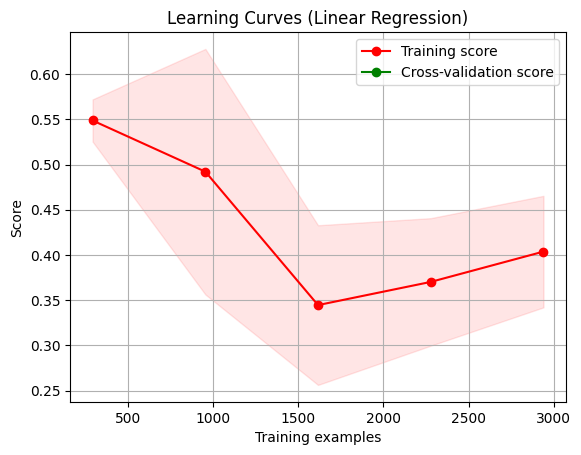

In [20]:
plot_learning_curve(lr, "Learning Curves (Linear Regression)", X_train, y_train, cv=5)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 718, in score
    Xt =

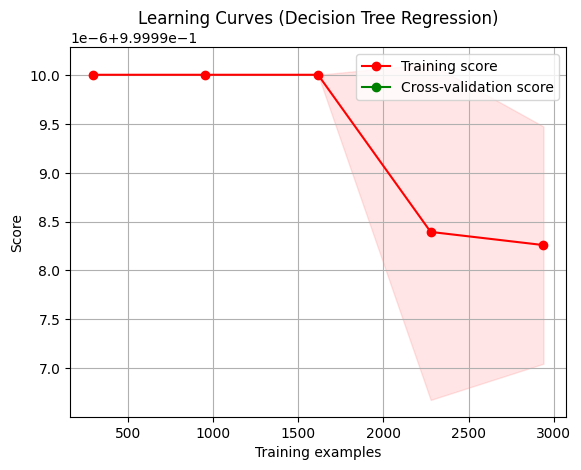

In [21]:
plot_learning_curve(dt, "Learning Curves (Decision Tree Regression)", X_train, y_train, cv=5)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


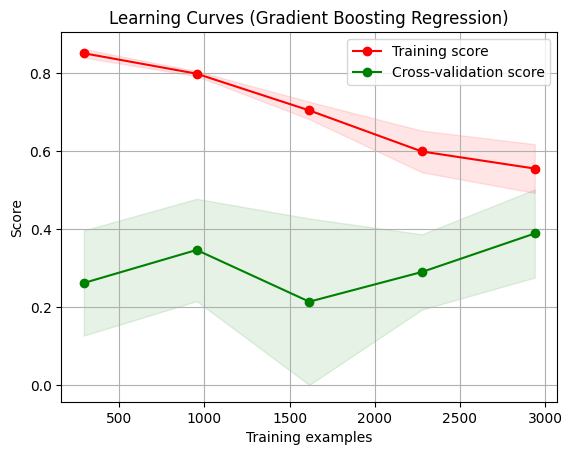

In [22]:
plot_learning_curve(gbreg, "Learning Curves (Gradient Boosting Regression)", X_train, y_train, cv=5)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


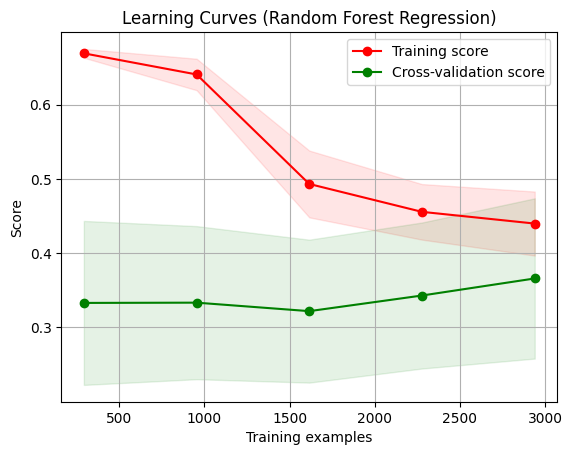

In [23]:
plot_learning_curve(rfreg, "Learning Curves (Random Forest Regression)", X_train, y_train, cv=5)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


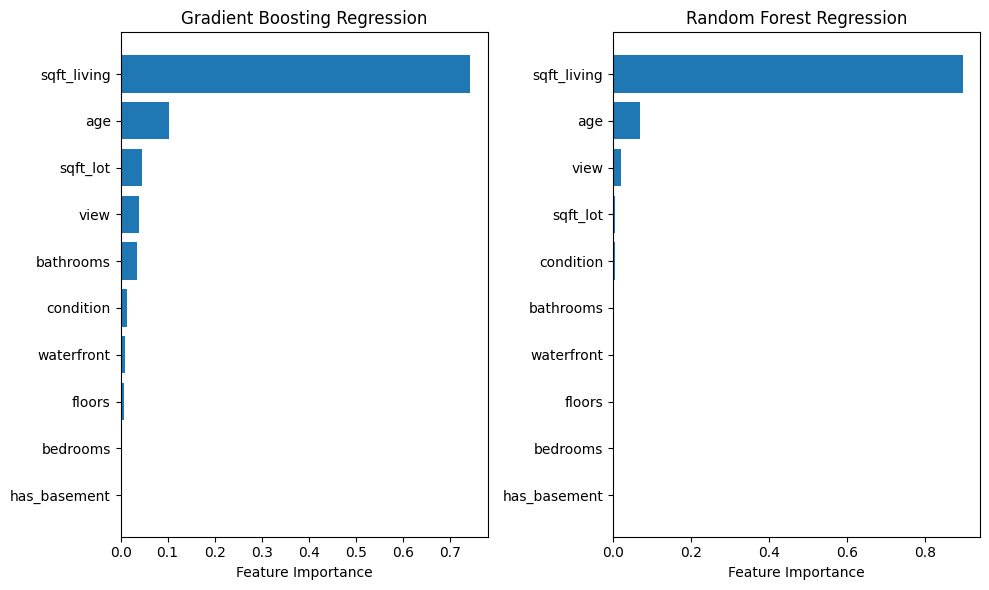

In [24]:
# Plot feature importance for Gradient Boosting Regression and Random Forest Regression
plt.figure(figsize=(10, 6))
feature_importance_gb = gbreg.feature_importances_
feature_importance_rf = rfreg.feature_importances_
feature_names = features
sorted_idx_gb = np.argsort(feature_importance_gb)
sorted_idx_rf = np.argsort(feature_importance_rf)

plt.subplot(1, 2, 1)
plt.barh(np.array(feature_names)[sorted_idx_gb], feature_importance_gb[sorted_idx_gb])
plt.xlabel('Feature Importance')
plt.title('Gradient Boosting Regression')

plt.subplot(1, 2, 2)
plt.barh(np.array(feature_names)[sorted_idx_rf], feature_importance_rf[sorted_idx_rf])
plt.xlabel('Feature Importance')
plt.title('Random Forest Regression')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


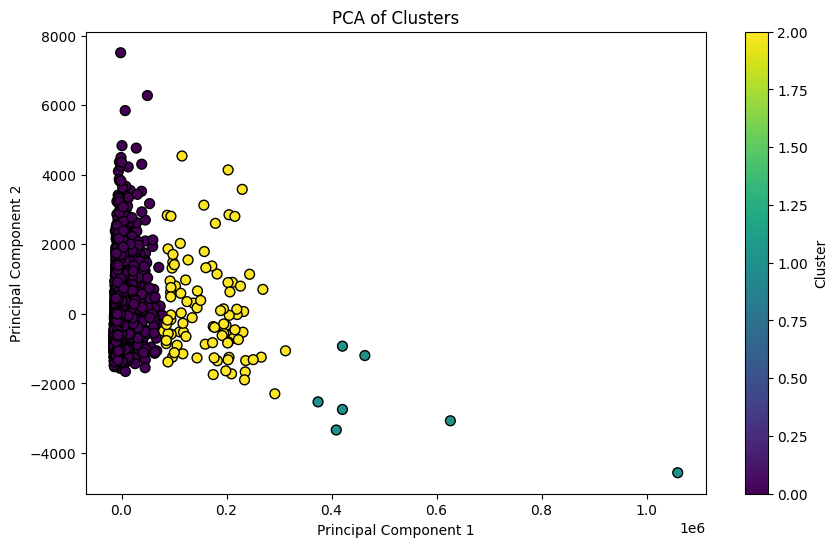

In [25]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Plot the PCA results with cluster assignments
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [26]:
optimal_k = 4

cluster_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
                    'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built',
                    'yr_renovated', 'age', 'has_basement']

# Check if the features are present in the DataFrame
missing_features = [feature for feature in cluster_features if feature not in df.columns]
if missing_features:
    raise KeyError(f"The DataFrame does not contain the following required columns: {missing_features}")

# Extract the features for clustering
X = df[cluster_features]

# Perform K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['cluster'] = kmeans.fit_predict(X)
cluster_groups = df.groupby('cluster')

# Analyze characteristics of each cluster
for cluster_id, cluster_data in cluster_groups:
    print(f'Cluster {cluster_id}:')
    print(cluster_data[cluster_features].describe())
    print('---')



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0:
          bedrooms    bathrooms  sqft_living      sqft_lot       floors  \
count  4217.000000  4217.000000  4217.000000   4217.000000  4217.000000   
mean      3.382737     2.129061  2069.195637   8132.510078     1.507351   
std       0.906474     0.760863   884.862575   5059.141598     0.543041   
min       0.000000     0.000000   520.000000    638.000000     1.000000   
25%       3.000000     1.750000  1430.000000   4950.000000     1.000000   
50%       3.000000     2.250000  1930.000000   7314.000000     1.500000   
75%       4.000000     2.500000  2540.000000   9800.000000     2.000000   
max       9.000000     6.750000  9640.000000  31626.000000     3.500000   

        waterfront         view    condition   sqft_above  sqft_basement  \
count  4217.000000  4217.000000  4217.000000  4217.000000    4217.000000   
mean      0.006403     0.228599     3.452691  1759.677970     309.517667   
std       0.079769     0.754121     0.678137   793.661702     451.100439   
min      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


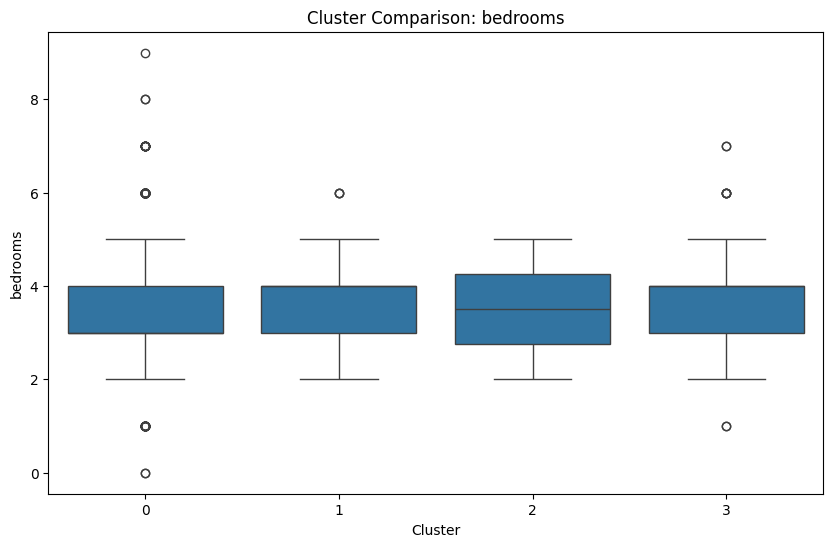

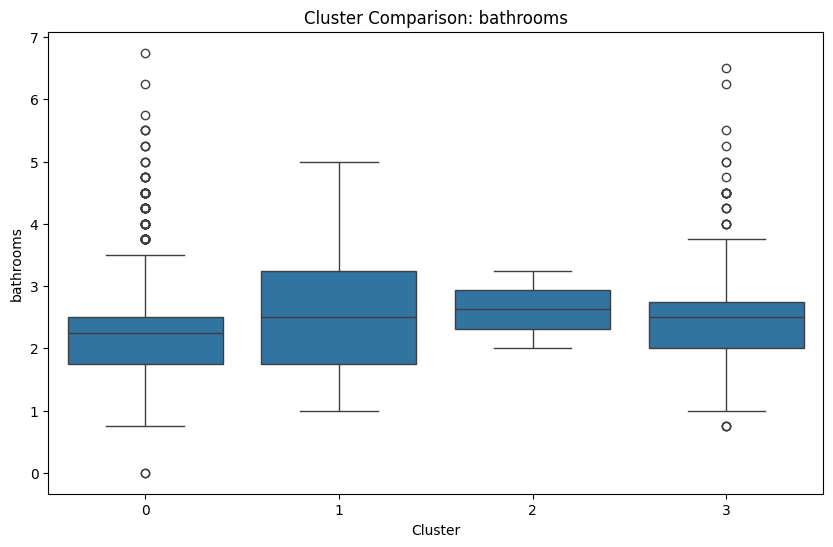

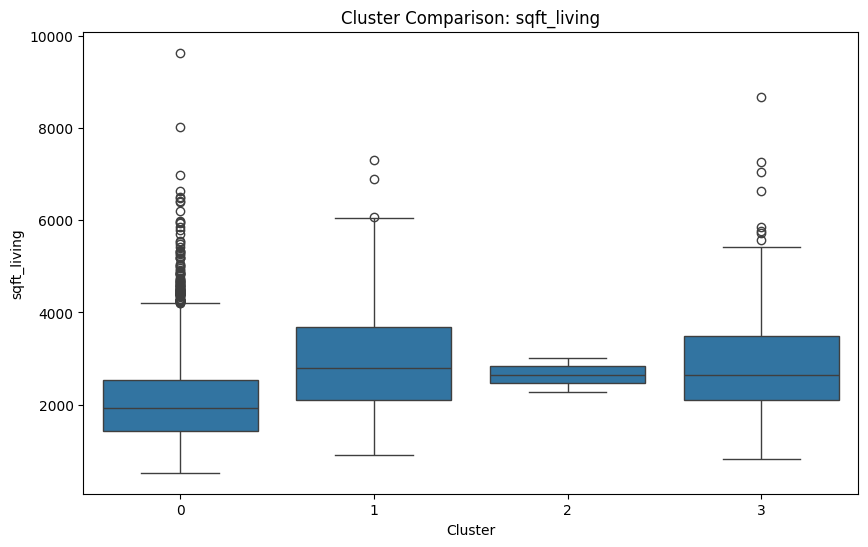

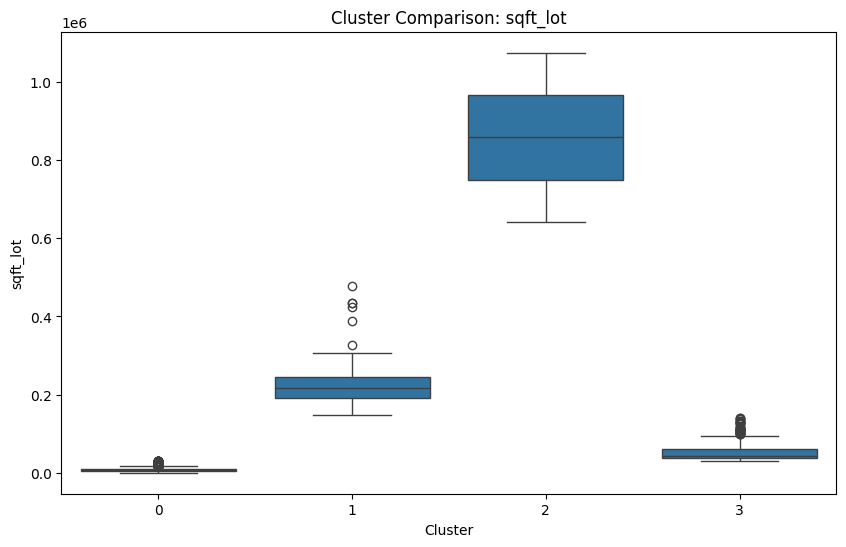

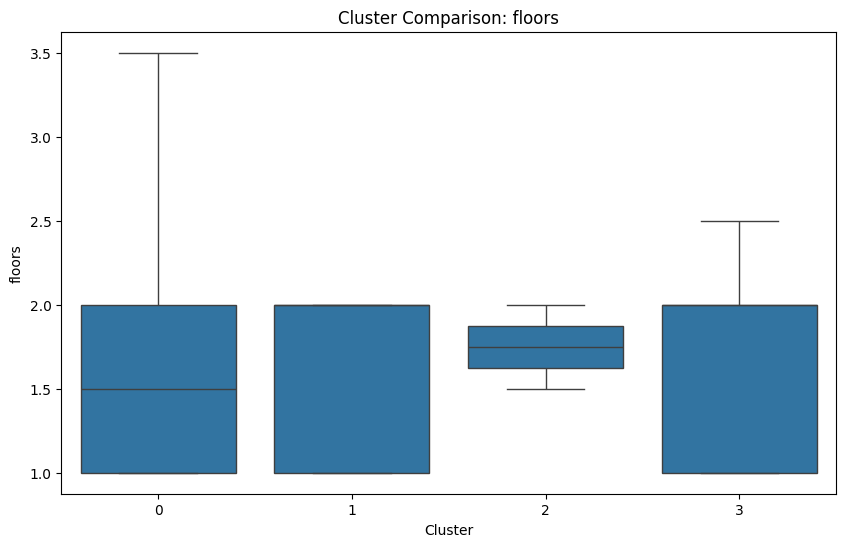

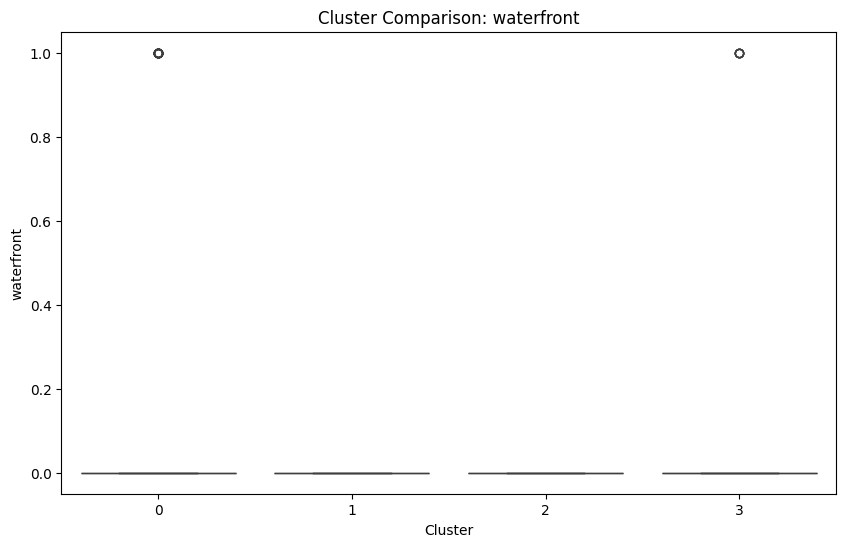

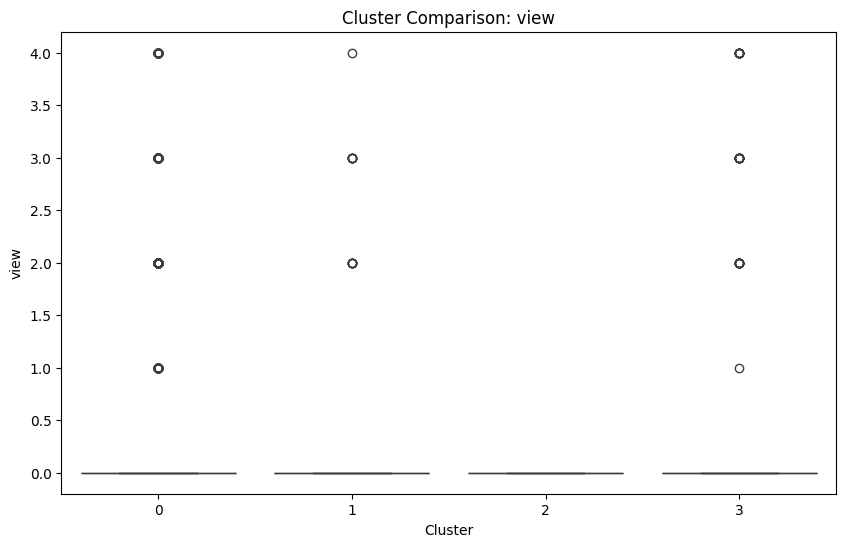

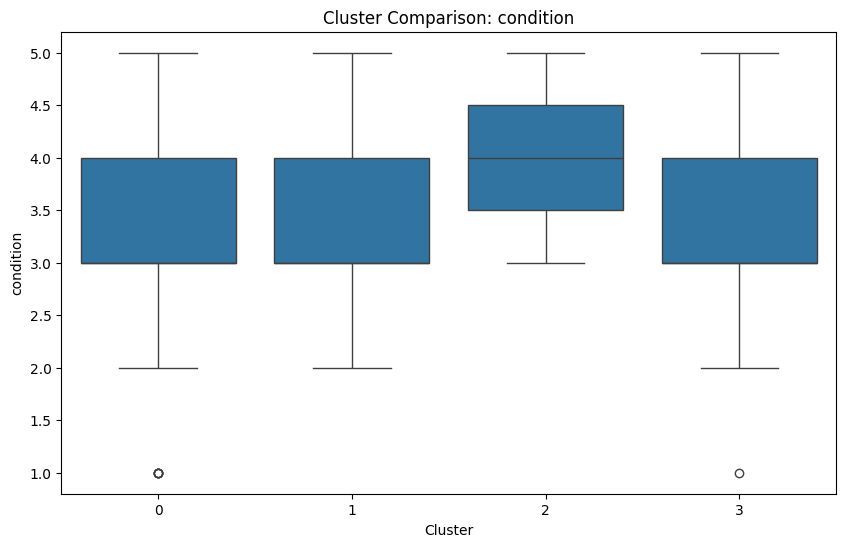

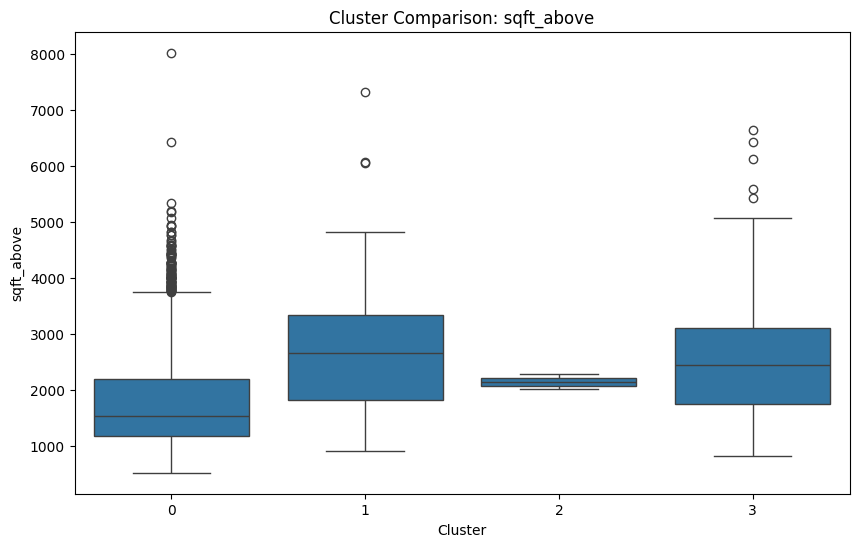

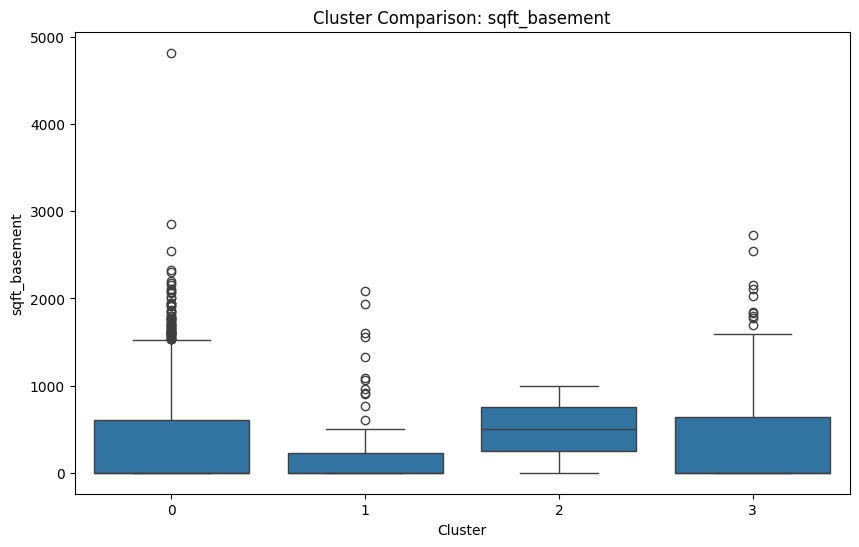

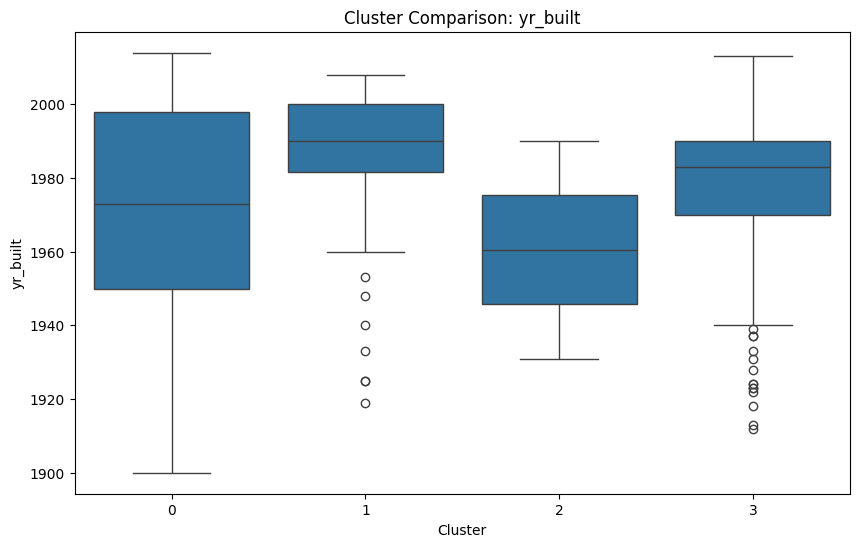

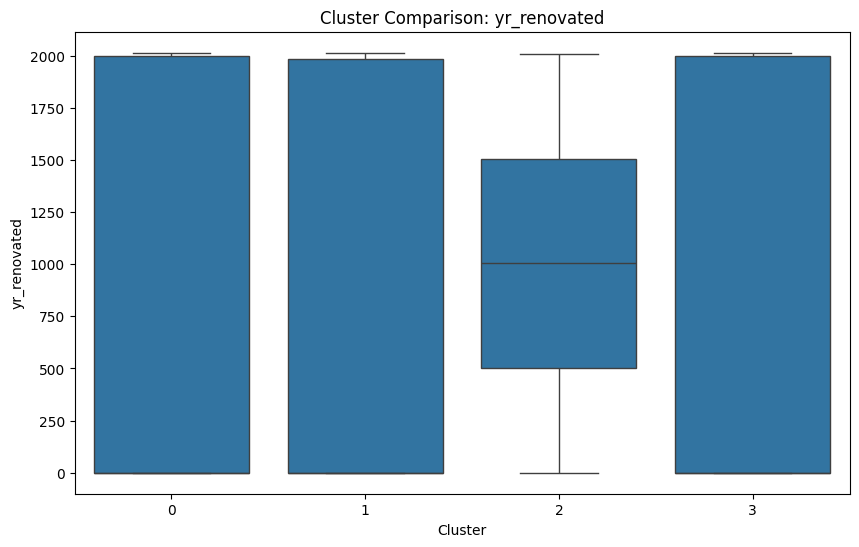

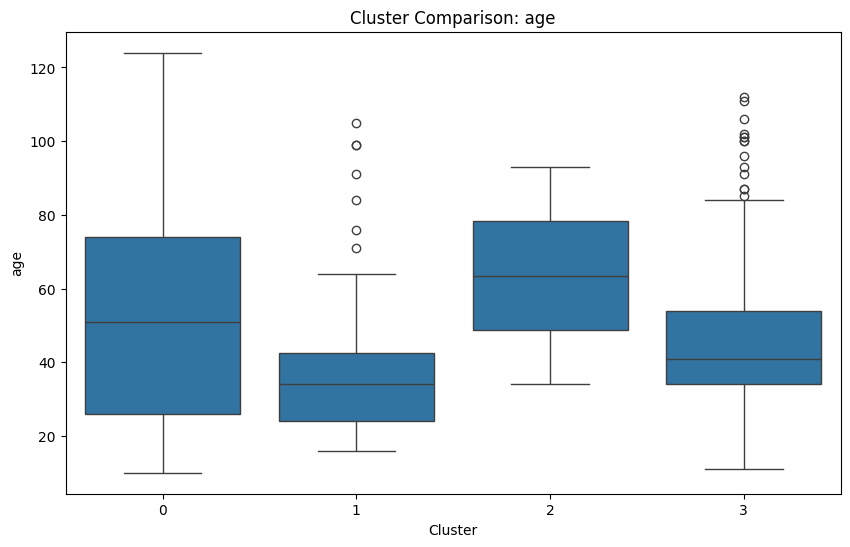

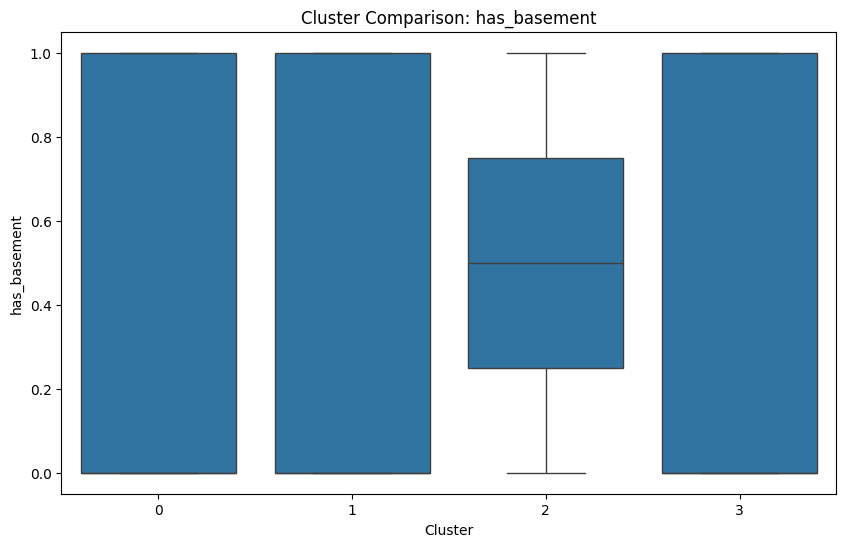

In [27]:
# Compare clusters using box plots
for feature in cluster_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster', y=feature, data=df)
    plt.title(f'Cluster Comparison: {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

In [28]:
# Select relevant columns for Association Rule Mining
association_cols = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
                    'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
                    'yr_built', 'yr_renovated', 'price']

association_df = df[association_cols].copy()

# Convert numeric columns to categorical for better analysis
association_df['bedrooms'] = pd.cut(association_df['bedrooms'], bins=[0, 2, 4, 6, float('inf')], labels=['0-2', '3-4', '5-6', '6+'])
association_df['bathrooms'] = pd.cut(association_df['bathrooms'], bins=[0, 1, 2, 3, 4, float('inf')], labels=['1', '2', '3', '4', '5+'])
association_df['sqft_living'] = pd.cut(association_df['sqft_living'], bins=5)
association_df['sqft_lot'] = pd.cut(association_df['sqft_lot'], bins=5)
association_df['floors'] = association_df['floors'].astype('category')
association_df['waterfront'] = association_df['waterfront'].astype('category')
association_df['view'] = association_df['view'].astype('category')
association_df['condition'] = association_df['condition'].astype('category')
association_df['sqft_above'] = pd.cut(association_df['sqft_above'], bins=5)
association_df['sqft_basement'] = pd.cut(association_df['sqft_basement'], bins=5)
association_df['yr_built'] = pd.cut(association_df['yr_built'], bins=5)
association_df['yr_renovated'] = association_df['yr_renovated'].apply(lambda x: 'Renovated' if x > 0 else 'Not Renovated')
association_df['price'] = pd.qcut(association_df['price'], q=5)

# Convert categorical variables to dummy variables
association_df = pd.get_dummies(association_df)

# Find frequent item sets
frequent_itemsets = apriori(association_df, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by confidence
rules = rules.sort_values(by='confidence', ascending=False)

# Display the top association rules
print(rules.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


                                              antecedents  \
10257   (bathrooms_2, yr_built_(1945.6, 1968.4], sqft_...   
3034                                 (view_0, floors_2.0)   
249954  (view_0, condition_3, yr_built_(1991.2, 2014.0...   
152415  (yr_renovated_Not Renovated, floors_1.0, condi...   
115318  (view_0, condition_3, yr_renovated_Not Renovat...   

                           consequents  antecedent support  \
10257                   (waterfront_0)            0.104071   
3034                    (waterfront_0)            0.354235   
249954                  (waterfront_0)            0.101241   
152415  (sqft_lot_(-435.58, 215354.0])            0.105378   
115318                  (waterfront_0)            0.240148   

        consequent support   support  confidence      lift  leverage  \
10257             0.993033  0.104071         1.0  1.007016  0.000725   
3034              0.993033  0.354235         1.0  1.007016  0.002468   
249954            0.993033  0.101241        

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


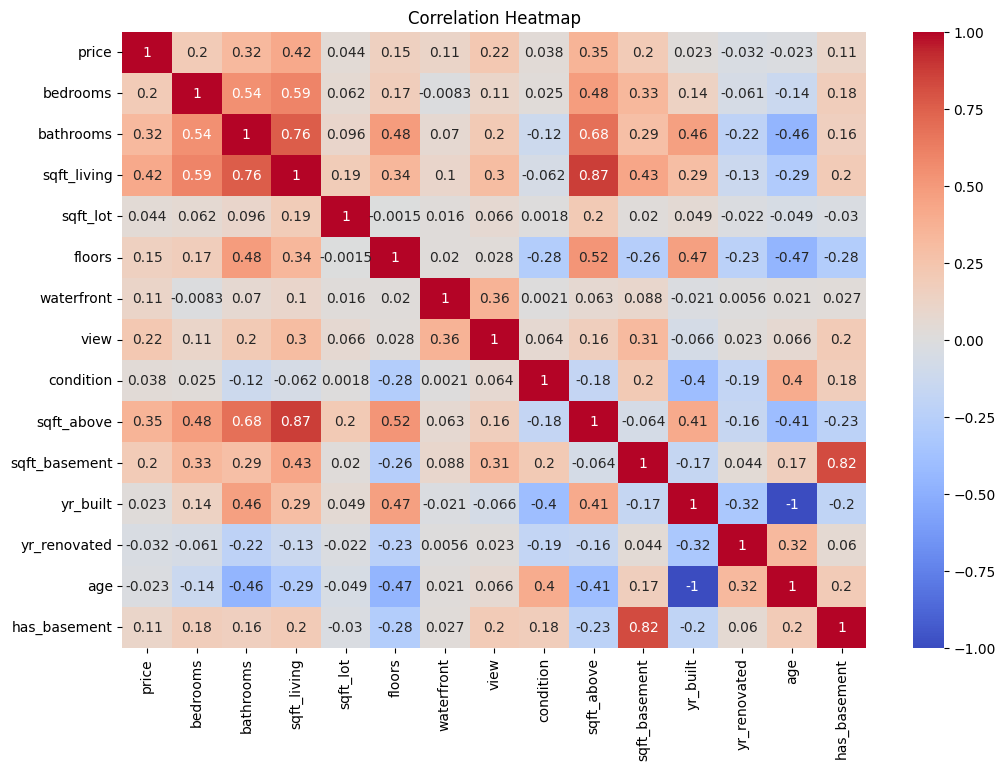

In [29]:
# Drop non-numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Visualization 1: Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


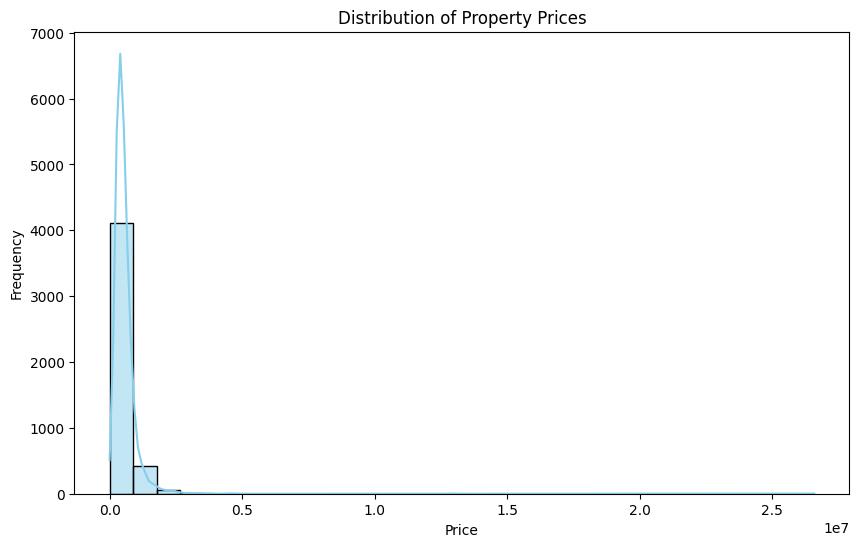

In [30]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Property Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [31]:
fig = px.scatter(df, x='sqft_living', y='price', color='bedrooms', hover_data=['condition'],
                 title='Property Price vs. Sqft Living Area')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



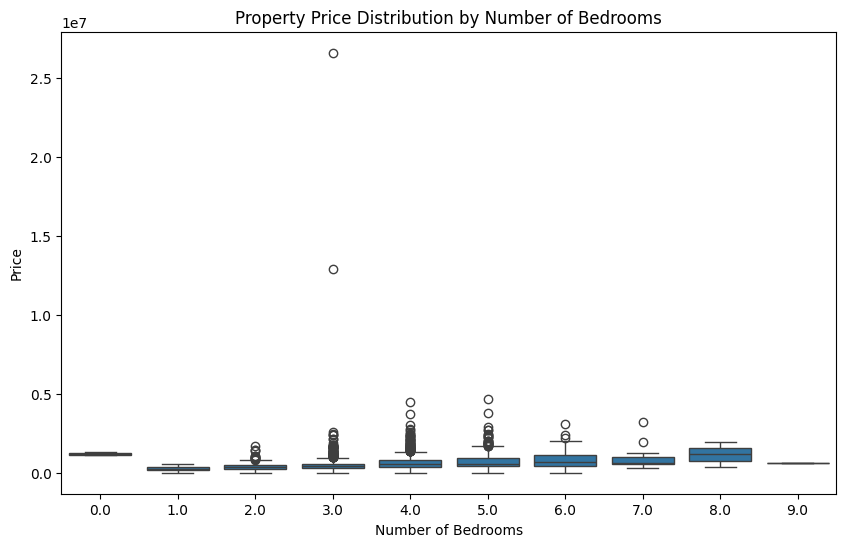

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='bedrooms', y='price', data=df)
plt.title('Property Price Distribution by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.show()

In [ ]:
city_price_mean = df.groupby('city')['price'].mean().reset_index()
city_price_mean_sorted = city_price_mean.sort_values(by='price', ascending=False).head(10)

fig = px.bar(city_price_mean_sorted, x='city', y='price', color='price',
             labels={'price': 'Average Price'}, title='Top 10 Cities by Average Property Price')
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

